In [1]:
pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/58/f7/a966b800b49cb5379e348bf0717df481051714a99ece15289718562f6952/yfinance-0.2.35-py2.py3-none-any.whl.metadata
     ---------------------------------------- 0.0/314.6 kB ? eta -:--:--
     --- --------------------------------- 30.7/314.6 kB 660.6 kB/s eta 0:00:01
     --- --------------------------------- 30.7/314.6 kB 660.6 kB/s eta 0:00:01
     ------- ----------------------------- 61.4/314.6 kB 409.6 kB/s eta 0:00:01
     ------------ ----------------------- 112.6/314.6 kB 656.4 kB/s eta 0:00:01
     ------------ ----------------------- 112.6/314.6 kB 656.4 kB/s eta 0:00:01
     ---------------------- ------------- 194.6/314.6 kB 737.3 kB/s eta 0:00:01
     ---------------------------- ------- 245.8/314.6 kB 885.4 kB/s eta 0:00:01
     -------------------------------- --- 286.7/314.6 kB 803.7 kB/s eta 0:00:01
     ------------------------------------ 314.6/314.6 kB 847.7 kB/s eta 0:00:00
 

In [1]:
import yfinance as yf

In [2]:
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [3]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-01-13,42799.445312,43234.660156,42464.144531,42842.382812,42842.382812,20601860469
2024-01-14,42842.261719,43065.597656,41724.613281,41796.269531,41796.269531,17521429522
2024-01-15,41715.066406,43319.722656,41705.417969,42511.968750,42511.968750,22320220558


In [44]:
 import numpy as np, pandas as pd, matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import statsmodels.api as sm


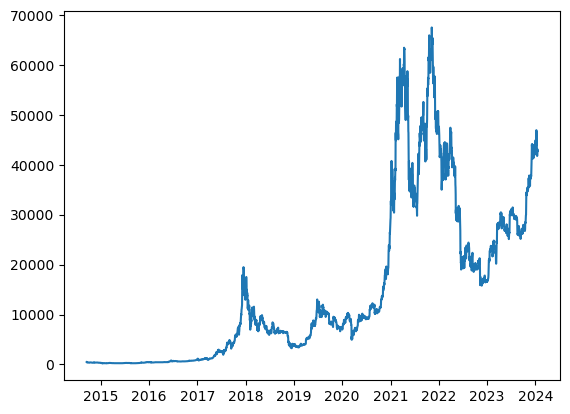

In [45]:
plt.plot(df.index, df['Adj Close'])
plt.show()

In [46]:
to_row = int(len(df)*0.9)
training_data = list(df[0:to_row]['Adj Close']) 
testing_data = list (df[to_row:]['Adj Close'])
training_data

[457.3340148925781,
 424.44000244140625,
 394.7959899902344,
 408.90399169921875,
 398.8210144042969,
 402.1520080566406,
 435.7909851074219,
 423.2049865722656,
 411.5740051269531,
 404.42498779296875,
 399.5199890136719,
 377.1809997558594,
 375.4670104980469,
 386.9440002441406,
 383.614990234375,
 375.0719909667969,
 359.5119934082031,
 328.8659973144531,
 320.510009765625,
 330.0790100097656,
 336.18701171875,
 352.94000244140625,
 365.0260009765625,
 361.56201171875,
 362.29901123046875,
 378.54901123046875,
 390.41400146484375,
 400.8699951171875,
 394.77301025390625,
 382.5559997558594,
 383.75799560546875,
 391.4419860839844,
 389.5459899902344,
 382.8450012207031,
 386.4750061035156,
 383.1579895019531,
 358.4169921875,
 358.3450012207031,
 347.27099609375,
 354.7040100097656,
 352.989013671875,
 357.6180114746094,
 335.59100341796875,
 345.30499267578125,
 338.3210144042969,
 325.7489929199219,
 325.8919982910156,
 327.5539855957031,
 330.49200439453125,
 339.4859924316406,


In [47]:
testing_data

[21870.875,
 21788.203125,
 21808.1015625,
 22220.8046875,
 24307.841796875,
 23623.474609375,
 24565.6015625,
 24641.27734375,
 24327.642578125,
 24829.1484375,
 24436.353515625,
 24188.84375,
 23947.4921875,
 23198.126953125,
 23175.375,
 23561.212890625,
 23522.87109375,
 23147.353515625,
 23646.55078125,
 23475.466796875,
 22362.6796875,
 22353.349609375,
 22435.513671875,
 22429.7578125,
 22219.76953125,
 21718.080078125,
 20363.021484375,
 20187.244140625,
 20632.41015625,
 22163.94921875,
 24197.533203125,
 24746.07421875,
 24375.9609375,
 25052.7890625,
 27423.9296875,
 26965.87890625,
 28038.67578125,
 27767.236328125,
 28175.81640625,
 27307.4375,
 28333.97265625,
 27493.28515625,
 27494.70703125,
 27994.330078125,
 27139.888671875,
 27268.130859375,
 28348.44140625,
 28033.5625,
 28478.484375,
 28411.03515625,
 28199.30859375,
 27790.220703125,
 28168.08984375,
 28177.984375,
 28044.140625,
 27925.859375,
 27947.794921875,
 28333.05078125,
 29652.98046875,
 30235.05859375,
 

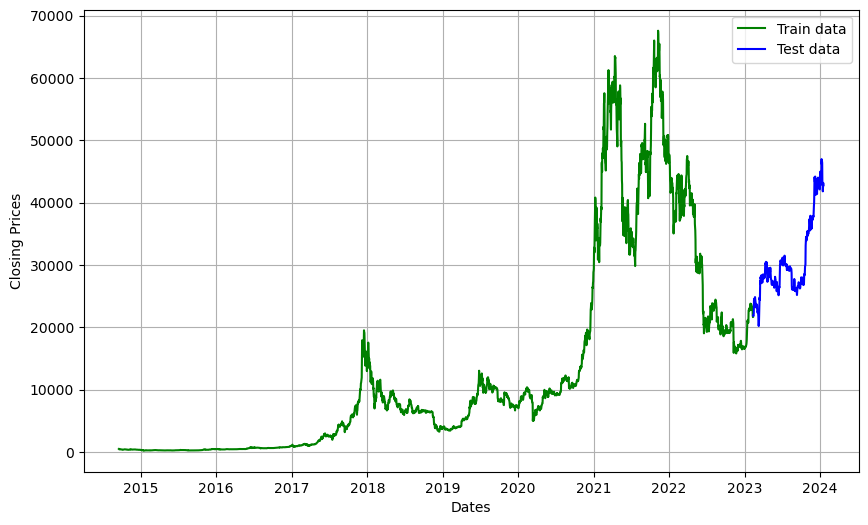

In [48]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df[0:to_row]['Adj Close'], 'green', label='Train data')
plt.plot(df[to_row:] ['Adj Close'], 'blue', label='Test data')
plt.legend()

In [49]:
model_predictions = []
    n_test_obser = len(testing_data)

In [51]:
for i in range(n_test_obser):
    model = ARIMA(training_data, order=(4, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    actual_test_value = testing_data[i]
    training_data.append(actual_test_value)

In [52]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3409
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -27553.187
Date:                Wed, 17 Jan 2024   AIC                          55116.375
Time:                        20:27:13   BIC                          55147.044
Sample:                             0   HQIC                         55127.335
                               - 3409                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0289      0.009     -3.167      0.002      -0.047      -0.011
ar.L2          0.0100      0.009      1.139      0.255      -0.007       0.027
ar.L3          0.0214      0.009      2.273      0.0

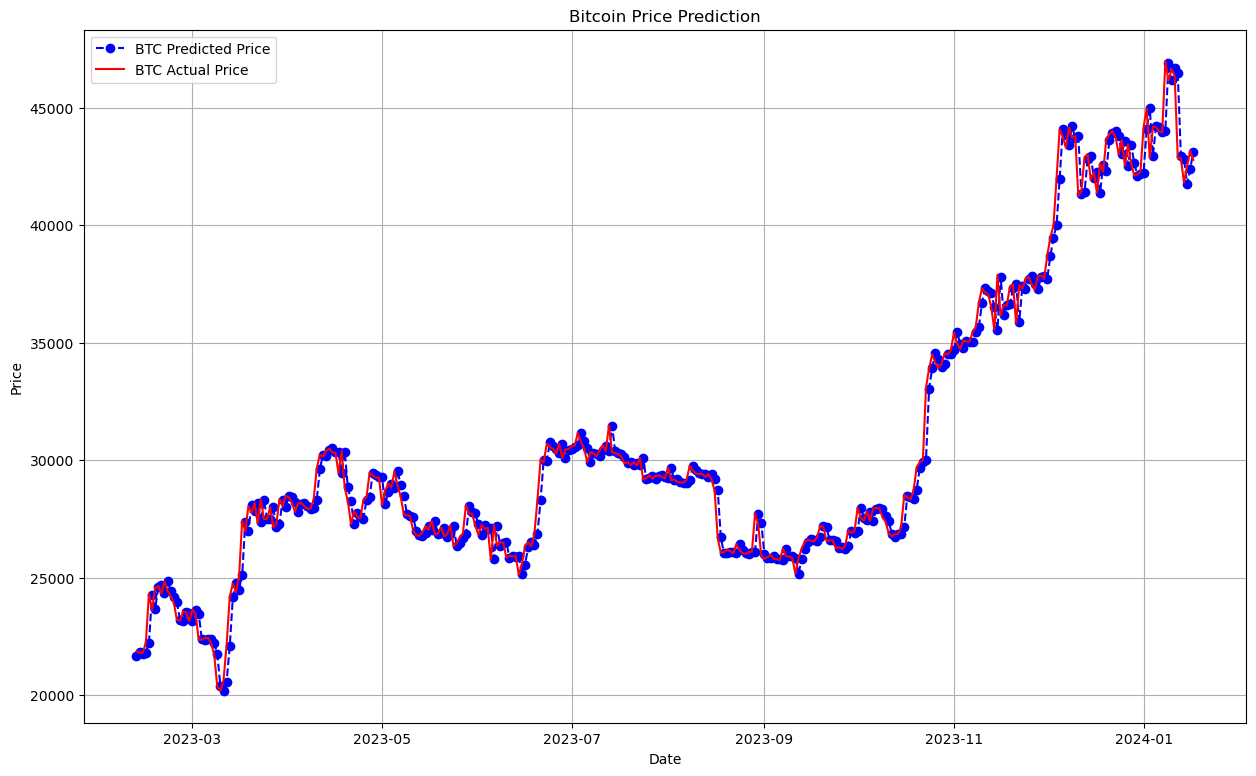

In [60]:
plt.figure(figsize=(15, 9))
plt.grid(True)
date_range = df[to_row:].index
plt.plot(date_range, model_predictions, color='blue', marker='o', linestyle='dashed', label='BTC Predicted Price')
plt.plot(date_range, testing_data, color='red', label='BTC Actual Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
